In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pyreadr
import json
import pandas as pd

sys.path.append('../')
from models import WRUPredictor, cBISGPredictor

In [2]:
key = json.load(open('../secrets/CENSUS_API_KEY.json'))
wru_predictor = WRUPredictor(census_api_key=key['CENSUS_API_KEY'])

In [3]:
cbisg_predictor = cBISGPredictor(census_api_key=key['CENSUS_API_KEY'])

# NC Cleaned Dataset 2012

Source: https://dataverse.harvard.edu/file.xhtml?fileId=6179001&version=1.0

- Need race mapping: original category, Surgeo category, WRU category
- BISG (WRU): successfully implemented
- fBISG (WRU): only work for certain counties -- records may have mis-matched geographic units that do not exist in the census
- BIFSG not available: no first name in dataset
- cBISG
- BISG (ZipWRUext)

In [16]:
try:
    result = pyreadr.read_r("../data/nc_voter_reg_cleanedwbisg.rds")
except FileNotFoundError:
        print(f"Error: File not found.")
        exit()

if not result:
    print("Error: No data found in the .rds file.")
    exit()

df = result[list(result.keys())[0]]
df.head()

,county_desc,zcta5,county_id,status_cd,voter_status_desc,surname,race_code,race_desc,ethnic_desc,party_desc,...,state_name,county_fips,county,state,herf_weight,max_race_prob,plural_race,white_plural,black_plural,other_plural
rownames,,,,,,,,,,,,,,,,,,,,,
1,ALAMANCE,27215,1,A,ACTIVE,BRYAN,W,WHITE,NOT HISPANIC or NOT LATINO,REPUBLICAN,...,North Carolina,37001,001,NC,0.750726,0.861850,white,1.0,0.0,0.0
2,ALAMANCE,27258,1,A,ACTIVE,POPE,W,WHITE,NOT HISPANIC or NOT LATINO,DEMOCRATIC,...,North Carolina,37001,001,NC,0.653723,0.791892,white,1.0,0.0,0.0
3,ALAMANCE,27217,1,A,ACTIVE,WHITESELL,W,WHITE,NOT HISPANIC or NOT LATINO,REPUBLICAN,...,North Carolina,37001,001,NC,0.845644,0.918256,white,1.0,0.0,0.0
4,ALAMANCE,27215,1,A,ACTIVE,KINNEY,W,WHITE,NOT HISPANIC or NOT LATINO,DEMOCRATIC,...,North Carolina,37001,001,NC,0.803672,0.894315,white,1.0,0.0,0.0
5,ALAMANCE,27215,1,A,ACTIVE,MOORE,W,WHITE,UNDESIGNATED,DEMOCRATIC,...,North Carolina,37001,001,NC,0.604750,0.751114,white,1.0,0.0,0.0


In [17]:
print(df['race_code'].unique())
print(df['race_desc'].unique())
print(df.columns)

['W' 'B' 'U' 'M' 'O' 'A' 'I' '']
['WHITE' 'BLACK or AFRICAN AMERICAN' 'UNDESIGNATED' 'TWO or MORE RACES'
 'OTHER' 'ASIAN' 'INDIAN AMERICAN or ALASKA NATIVE' '']
Index(['county_desc', 'zcta5', 'county_id', 'status_cd', 'voter_status_desc',
       'surname', 'race_code', 'race_desc', 'ethnic_desc', 'party_desc',
       'precinct_abbrv', 'precinct_desc', 'vtd_abbrv', 'vtd_desc',
       'cong_dist_abbrv', 'white', 'black', 'other_race', 'democrat', 'gop',
       'other_party', 'surname.match', 'pred.whi', 'pred.bla', 'pred.his',
       'pred.asi', 'pred.oth', 'state_name', 'county_fips', 'county', 'state',
       'herf_weight', 'max_race_prob', 'plural_race', 'white_plural',
       'black_plural', 'other_plural'],
      dtype='object')


In [18]:
df = df[['county_desc', 'zcta5', 'county_id', 'surname', 'race_code', 'race_desc', 'state', 'county', 'party_desc']]

## BISG

In [19]:
bisg_result = wru_predictor.inference(df, model='BISG', state="NC", year="2020", census_geo="zcta", census_surname=True, 
                                 surname_only=False, names_to_use="surname", impute_missing=False, skip_bad_geos=True, use_counties=False)
bisg_result

R[write to console]: Collecting 2020 Census data...



Getting census data...


R[write to console]: Predicting race for 2020

R[write to console]: Proceeding with last name predictions...



Predicting race...
ℹ Downloading "wru-data-census_last_c.rds"...
  |======================================================================| 100%
ℹ Downloading "wru-data-first_c.rds"...
  |======================================================================| 100%
ℹ Downloading "wru-data-last_c.rds"...
  |======================================================================| 100%
ℹ Downloading "wru-data-mid_c.rds"...
  |======================================================================| 100%


R[write to console]: Proceeding with Census geographic data at zcta level...

R[write to console]: Using Census geographic data from provided census.data object...

R[write to console]: State 1 of 1: NC

R[write to console]: The following locations in the voter.file are not available in the census data.(listed as state-zcta):
NC-23917, NC-24148, NC-24333, NC-24348, NC-24506, NC-27010, NC-27049, NC-27116, NC-27228, NC-27552, NC-27699, NC-27802, NC-27811, NC-27835, NC-27836, NC-27838, NC-27854, NC-27859, NC-27867, NC-27868, NC-27887, NC-28010, NC-28035, NC-28038, NC-28123, NC-28145, NC-28446, NC-28522, NC-28583, NC-28608, NC-28647, NC-28661, NC-28687, NC-28699, NC-28703, NC-28728, NC-28737, NC-28750, NC-28765, NC-28776

R[write to console]: NOTE: Skipping unavailable geolocations. Returning partial data set.



ℹ All local files already up-to-date!


R[write to console]: 328614 (4.9%) individuals' last names were not matched.



,county_desc,zcta,county_id,surname,race_code,race_desc,state,county,party_desc,white,black,hispanic,api,other
3197337,ALAMANCE,27215,1,BRYAN,W,WHITE,NC,001,REPUBLICAN,0.761065,0.168220,0.025962,0.003667,0.041087
1466291,ALAMANCE,27258,1,POPE,W,WHITE,NC,001,DEMOCRATIC,0.669970,0.254595,0.020914,0.001594,0.052928
2986137,ALAMANCE,27217,1,WHITESELL,W,WHITE,NC,001,REPUBLICAN,0.878393,0.023442,0.028181,0.001396,0.068587
2302736,ALAMANCE,27215,1,KINNEY,W,WHITE,NC,001,DEMOCRATIC,0.804244,0.115038,0.015489,0.005073,0.060156
1302701,ALAMANCE,27215,1,MOORE,W,WHITE,NC,001,DEMOCRATIC,0.571403,0.363927,0.014588,0.002533,0.047550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412195,RUTHERFORD,28024,81,CARROLL,W,WHITE,NC,161,REPUBLICAN,0.843132,0.000000,0.018538,0.000000,0.138330
3789479,YANCEY,28755,100,HOILMAN,W,WHITE,NC,199,REPUBLICAN,0.846684,0.000000,0.000000,0.000000,0.153316
22458510,YANCEY,28755,100,LINDENAUX,W,WHITE,NC,199,UNAFFILIATED,0.619048,0.000000,0.190476,0.000000,0.190476
2029164,YANCEY,28755,100,MURPHY,W,WHITE,NC,199,DEMOCRATIC,0.786829,0.000000,0.026342,0.000000,0.186829


In [20]:
# fbisg Works for single county though
df_county = df[df['county_id']==1].copy().reset_index(drop=True)
fbisg_result_1 = wru_predictor.inference(df_county, model='fBISG', state="NC", year="2020", census_geo="zcta", census_surname=True, 
                                          surname_only=False, names_to_use="surname", impute_missing=True, skip_bad_geos=True, use_counties=False)
fbisg_result_1

R[write to console]: Collecting 2020 Census data...



Getting census data...


R[write to console]: Predicting race for 2020

R[write to console]: Using `predict_race` to obtain initial race prediction priors with BISG model

R[write to console]: Predicting race for 2020

R[write to console]: Proceeding with last name predictions...



Predicting race...
ℹ All local files already up-to-date!


R[write to console]: Proceeding with Census geographic data at zcta level...

R[write to console]: Using Census geographic data from provided census.data object...

R[write to console]: State 1 of 1: NC



ℹ All local files already up-to-date!


R[write to console]: 3694 (3.8%) individuals' last names were not matched.



ℹ All local files already up-to-date!


R[write to console]: fBISG relies on MCMC; for reproducibility, I am setting RNG seed and returning it as attribute 'RNGseed'.
To silence this message, you can set a seed explicitly by defining the 'seed' element in the control list.

R[write to console]: Forming Pr(race | location) tables from census data...


R[write to console]: Pre-processing names...


R[write to console]: Sampling races...




  |======================================================================| 100%


R[write to console]: Post-processing results and wrapping up.




,county_desc,zcta,county_id,surname,race_code,race_desc,state,county,party_desc,white,black,hispanic,api,other
0,ALAMANCE,27215,1,BRYAN,W,WHITE,NC,001,REPUBLICAN,0.733,0.210,0.020,0.003,0.034
1,ALAMANCE,27258,1,POPE,W,WHITE,NC,001,DEMOCRATIC,0.650,0.277,0.015,0.000,0.058
2,ALAMANCE,27217,1,WHITESELL,W,WHITE,NC,001,REPUBLICAN,0.889,0.025,0.022,0.001,0.063
3,ALAMANCE,27215,1,KINNEY,W,WHITE,NC,001,DEMOCRATIC,0.780,0.142,0.013,0.005,0.060
4,ALAMANCE,27215,1,MOORE,W,WHITE,NC,001,DEMOCRATIC,0.575,0.377,0.005,0.002,0.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96808,ALAMANCE,27244,1,VASQUEZ,W,WHITE,NC,001,UNAFFILIATED,0.200,0.015,0.755,0.006,0.024
96809,ALAMANCE,27217,1,WILLIAMSON,B,BLACK or AFRICAN AMERICAN,NC,001,DEMOCRATIC,0.448,0.480,0.025,0.001,0.046
96810,ALAMANCE,27217,1,STROUT,W,WHITE,NC,001,REPUBLICAN,0.873,0.055,0.028,0.001,0.043
96811,ALAMANCE,27244,1,KETCHAM,W,WHITE,NC,001,DEMOCRATIC,0.956,0.007,0.005,0.001,0.031


# GA 2012 Dataset

Source: https://dataverse.harvard.edu/file.xhtml?fileId=6178995&version=1.0

- No party info in this dataset
- Need race mapping: original category, Surgeo category, WRU category
- BISG (WRU): successfully implemented
- fBISG (WRU): only works for certain counties without bad geos -- records may have mis-matched geographic units that do not exist in the census
- BIFSG not available: no first name in dataset
- cBISG not available: no useful Y label
- BISG (ZipWRUext)

In [21]:
try:
    result = pyreadr.read_r("../data/ga_voter_reg_cleanedwbisg.rds")
except FileNotFoundError:
        print(f"Error: File not found.")
        exit()

if not result:
    print("Error: No data found in the .rds file.")
    exit()

df = result[list(result.keys())[0]]
df.head()

,county,zcta5,county_code,voter_status,surname,race,county_precinct_id,city_precinct_id,congressional_district,senate_district,...,county_fips,localty,state,herf_weight,max_race_prob,plural_race,white_plural,black_plural,hispanic_plural,other_plural
rownames,,,,,,,,,,,,,,,,,,,,,
1,001,31513,1,A,ALTMAN,WH,1C,,12,19,...,13001,APPLING,GA,0.907411,0.952119,white,1.0,0.0,0.0,0.0
2,001,31513,1,A,MAYERS,WH,3C,BAXLE,12,19,...,13001,APPLING,GA,0.524430,0.677908,white,1.0,0.0,0.0,0.0
3,001,31513,1,A,HORNE,WH,3A1,,12,19,...,13001,APPLING,GA,0.698346,0.822963,white,1.0,0.0,0.0,0.0
4,001,31513,1,A,WILLIAMS,WH,1C,,12,19,...,13001,APPLING,GA,0.492362,0.617804,white,1.0,0.0,0.0,0.0
5,001,31563,1,A,BOATRIGHT,WH,4B,,12,19,...,13001,APPLING,GA,0.906754,0.951680,white,1.0,0.0,0.0,0.0


In [22]:
print(df['race'].unique())
print(df.columns)

['WH' 'BH' 'U' 'HP' 'OT' 'AP' 'AI']
Index(['county', 'zcta5', 'county_code', 'voter_status', 'surname', 'race',
       'county_precinct_id', 'city_precinct_id', 'congressional_district',
       'senate_district', 'house_district', 'white', 'black', 'hispanic',
       'other_race', 'surname.match', 'pred.whi', 'pred.bla', 'pred.his',
       'pred.asi', 'pred.oth', 'state_name', 'county_fips', 'localty', 'state',
       'herf_weight', 'max_race_prob', 'plural_race', 'white_plural',
       'black_plural', 'hispanic_plural', 'other_plural'],
      dtype='object')


In [23]:
df = df[['county', 'zcta5', 'county_code', 'surname', 'race', 'state']]

## BISG

In [24]:
bisg_result = wru_predictor.inference(df, model='BISG', state="GA", year="2020", census_geo="zcta", census_surname=True, 
                                 surname_only=False, names_to_use="surname", impute_missing=False, skip_bad_geos=True, use_counties=False)
bisg_result

R[write to console]: Collecting 2020 Census data...



Getting census data...


R[write to console]: Predicting race for 2020

R[write to console]: Proceeding with last name predictions...



Predicting race...
ℹ All local files already up-to-date!


R[write to console]: Proceeding with Census geographic data at zcta level...

R[write to console]: Using Census geographic data from provided census.data object...

R[write to console]: State 1 of 1: GA

R[write to console]: The following locations in the voter.file are not available in the census data.(listed as state-zcta):
GA-00000, GA-09827, GA-21069, GA-28906, GA-30000, GA-30010, GA-30036, GA-30061, GA-30069, GA-30086, GA-30138, GA-30151, GA-30172, GA-30211, GA-30212, GA-30266, GA-30270, GA-30300, GA-30302, GA-30325, GA-30330, GA-30333, GA-30335, GA-30388, GA-30447, GA-30640, GA-30732, GA-30806, GA-30819, GA-31073, GA-31099, GA-31319, GA-31534, GA-31612, GA-31656, GA-31713, GA-31739, GA-31786, GA-31902, GA-32076, GA-32568, GA-33124, GA-33174, GA-33315, GA-33326, GA-36863, GA-37380, GA-37396, GA-37412, GA-39829, GA-39898, GA-C1092

R[write to console]: NOTE: Skipping unavailable geolocations. Returning partial data set.



ℹ All local files already up-to-date!


R[write to console]: 359770 (4.9%) individuals' last names were not matched.



,county,zcta,county_code,surname,race,state,white,black,hispanic,api,other
5376184,001,31513,1,ALTMAN,WH,GA,0.923885,0.043792,0.015547,0.000981,0.015795
4073850,001,31513,1,MAYERS,WH,GA,0.463930,0.483617,0.026588,0.000617,0.025247
3298616,001,31513,1,HORNE,WH,GA,0.644820,0.320478,0.010780,0.000745,0.023178
433274,001,31513,1,WILLIAMS,WH,GA,0.378250,0.578334,0.012333,0.000567,0.030516
4685213,001,31563,1,BOATRIGHT,WH,GA,0.900553,0.071403,0.005388,0.000243,0.022412
...,...,...,...,...,...,...,...,...,...,...,...
5876295,299,31564,148,BAISDEN,WH,GA,0.669838,0.234788,0.030474,0.000000,0.064899
5876321,299,31564,148,BAISDEN,WH,GA,0.669838,0.234788,0.030474,0.000000,0.064899
5149311,299,31564,148,THIGPEN,WH,GA,0.504956,0.405431,0.016369,0.000000,0.073244
5973589,299,31564,148,SHIRAH,U,GA,0.926287,0.012425,0.013927,0.000000,0.047361


In [25]:
bisg_result[bisg_result['county_code']==12]

,county,zcta,county_code,surname,race,state,white,black,hispanic,api,other
5819345,023,31014,12,ANGUS,U,GA,0.767720,0.194843,0.007806,0.004289,0.025343
1629683,023,31014,12,BURNS,BH,GA,0.743757,0.229017,0.004727,0.001385,0.021114
1526622,023,31014,12,HARVEY,WH,GA,0.585960,0.378653,0.004467,0.001136,0.029785
5003293,023,31014,12,FORDHAM,U,GA,0.568857,0.409479,0.004279,0.000753,0.016632
5256567,023,31014,12,GALLIMORE,BH,GA,0.669910,0.308575,0.005204,0.000539,0.015773
...,...,...,...,...,...,...,...,...,...,...,...
116349,023,31014,12,JOHNSON,WH,GA,0.477420,0.492801,0.003931,0.001109,0.024739
4300997,023,31014,12,GILES,WH,GA,0.566570,0.401008,0.010156,0.000970,0.021296
5799549,023,31014,12,HUCKABY,WH,GA,0.740521,0.225996,0.003664,0.000943,0.028875
1091023,023,31014,12,MILLER,WH,GA,0.795533,0.178884,0.004223,0.001295,0.020066


In [26]:
fbisg_result = wru_predictor.inference(df, model='fBISG', state="GA", year="2020", census_geo="zcta", census_surname=True, 
                                       surname_only=False, names_to_use="surname", impute_missing=True, skip_bad_geos=True, use_counties=False)
fbisg_result

R[write to console]: Collecting 2020 Census data...



Getting census data...


R[write to console]: Predicting race for 2020

R[write to console]: Using `predict_race` to obtain initial race prediction priors with BISG model

R[write to console]: Predicting race for 2020



Predicting race...


R[write to console]: Proceeding with last name predictions...



ℹ All local files already up-to-date!


R[write to console]: Proceeding with Census geographic data at zcta level...

R[write to console]: Using Census geographic data from provided census.data object...

R[write to console]: State 1 of 1: GA

R[write to console]: The following locations in the voter.file are not available in the census data.(listed as state-zcta):
GA-00000, GA-09827, GA-21069, GA-28906, GA-30000, GA-30010, GA-30036, GA-30061, GA-30069, GA-30086, GA-30138, GA-30151, GA-30172, GA-30211, GA-30212, GA-30266, GA-30270, GA-30300, GA-30302, GA-30325, GA-30330, GA-30333, GA-30335, GA-30388, GA-30447, GA-30640, GA-30732, GA-30806, GA-30819, GA-31073, GA-31099, GA-31319, GA-31534, GA-31612, GA-31656, GA-31713, GA-31739, GA-31786, GA-31902, GA-32076, GA-32568, GA-33124, GA-33174, GA-33315, GA-33326, GA-36863, GA-37380, GA-37396, GA-37412, GA-39829, GA-39898, GA-C1092

R[write to console]: NOTE: Skipping unavailable geolocations. Returning partial data set.



ℹ All local files already up-to-date!


R[write to console]: 359770 (4.9%) individuals' last names were not matched.

R[write to console]: Error in (function (voter.file, census.surname = TRUE, surname.only = FALSE,  : 
  Some initial race values are NA.

         If you didn't provide initial values, check the results of calling predict_race() on the voter.file you want me to work on.

         The most likely reason for getting a missing race prediction is having a geolocation that does not match 
 
         locations on the census. If this problem persists, try impute.missing = TRUE or model = fBISG.



RRuntimeError: Error in (function (voter.file, census.surname = TRUE, surname.only = FALSE,  : 
  Some initial race values are NA.

         If you didn't provide initial values, check the results of calling predict_race() on the voter.file you want me to work on.

         The most likely reason for getting a missing race prediction is having a geolocation that does not match 
 
         locations on the census. If this problem persists, try impute.missing = TRUE or model = fBISG.


In [27]:
# fbisg Works for single county though
df_county = df[df['county_code']==12].copy().reset_index(drop=True)
fbisg_result_12 = wru_predictor.inference(df_county, model='fBISG', state="GA", year="2020", census_geo="zcta", census_surname=True, 
                                          surname_only=False, names_to_use="surname", impute_missing=True, skip_bad_geos=True, use_counties=False)
fbisg_result_12

R[write to console]: Collecting 2020 Census data...



Getting census data...


R[write to console]: Predicting race for 2020

R[write to console]: Using `predict_race` to obtain initial race prediction priors with BISG model

R[write to console]: Predicting race for 2020

R[write to console]: Proceeding with last name predictions...



Predicting race...
ℹ All local files already up-to-date!


R[write to console]: Proceeding with Census geographic data at zcta level...

R[write to console]: Using Census geographic data from provided census.data object...

R[write to console]: State 1 of 1: GA



ℹ All local files already up-to-date!


R[write to console]: 175 (2.3%) individuals' last names were not matched.



ℹ All local files already up-to-date!


R[write to console]: fBISG relies on MCMC; for reproducibility, I am setting RNG seed and returning it as attribute 'RNGseed'.
To silence this message, you can set a seed explicitly by defining the 'seed' element in the control list.

R[write to console]: Forming Pr(race | location) tables from census data...


R[write to console]: Pre-processing names...


R[write to console]: Sampling races...




  |======================================================================| 100%


R[write to console]: Post-processing results and wrapping up.




,county,zcta,county_code,surname,race,state,white,black,hispanic,api,other
0,023,31014,12,ANGUS,U,GA,0.753,0.210,0.006,0.004,0.027
1,023,31014,12,BURNS,BH,GA,0.721,0.256,0.004,0.000,0.019
2,023,31014,12,HARVEY,WH,GA,0.541,0.427,0.001,0.001,0.030
3,023,31014,12,FORDHAM,U,GA,0.508,0.473,0.002,0.001,0.016
4,023,31014,12,GALLIMORE,BH,GA,0.623,0.361,0.001,0.000,0.015
...,...,...,...,...,...,...,...,...,...,...,...
7744,023,31014,12,JOHNSON,WH,GA,0.422,0.555,0.004,0.001,0.018
7745,023,31014,12,GILES,WH,GA,0.510,0.460,0.010,0.002,0.018
7746,023,31014,12,HUCKABY,WH,GA,0.693,0.276,0.000,0.001,0.030
7747,023,31014,12,MILLER,WH,GA,0.742,0.234,0.002,0.002,0.020


# N/A



# NC 2022 Dataset

Source: https://www.ncsbe.gov/results-data/voter-registration-data

- Need zipcode mapping: cooperjaXC zip-codes
- Need race mapping: original category, Surgeo category, WRU category
- BISG (WRU): successfully implemented
- fBISG (WRU): successfully implemented for certain county
- BIFSG (WRU)
- BISG (zipWRUext)
- BIFSG (zipWRUext)
- BISG (surgeo 2010)
- BIFSG (surgeo 2020)
- cBISG

In [4]:
%load_ext autoreload
%autoreload 2

from utils import load_voter_data_txt, clean_voter_data, plot_voter_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
voter_data_path = "../data/ncvoter_Statewide.txt"    # statewide
# voter_data_path = "../data/ncvoter53.txt"    # lee county

#voter_data = load_voter_data_txt(voter_data_path, delimiter='\t', encoding='ISO-8859-1')
voter_data = pd.read_pickle("../data/voter_data.pkl")
print(voter_data.shape)
voter_data.head()

(8781283, 67)


,county_id,county_desc,voter_reg_num,ncid,last_name,first_name,middle_name,name_suffix_lbl,status_cd,voter_status_desc,...,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,vtd_abbrv,vtd_desc
0,1,ALAMANCE,9005990,AA56273,AABEL,RUTH,EVELYN,NaN,R,REMOVED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ALAMANCE,9178574,AA201627,AARDEN,JONI,AUTUMN,NaN,R,REMOVED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,ALAMANCE,9205561,AA216996,AARMSTRONG,TIMOTHY,DUANE,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,PROSECUTORIAL DISTRICT 17,103,103
3,1,ALAMANCE,9048723,AA98377,AARON,CHRISTINA,CASTAGNA,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,BUR,BURLINGTON,17.0,PROSECUTORIAL DISTRICT 17,03S,03S
4,1,ALAMANCE,9019674,AA69747,AARON,CLAUDIA,HAYDEN,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,BUR,BURLINGTON,17.0,PROSECUTORIAL DISTRICT 17,124,124


In [6]:
print(voter_data['race_code'].unique())
print(voter_data['ethnic_code'].unique())
print(voter_data['middle_name'].unique())
print(voter_data['first_name'].unique())
print(set(zip(voter_data['race_code'], voter_data['ethnic_code'])))
print(voter_data.columns)

['W' 'B' 'U' 'A' 'O' 'M' 'I' 'P' ' ']
['NL' 'UN' 'HL']
['EVELYN' 'AUTUMN' 'DUANE' ... 'KIERSTED' 'ANNA RUDNICK' 'ROBERT-GIBBON']
['RUTH' 'JONI' 'TIMOTHY' ... 'ARLONZIA' 'ALEXABDER' 'MCIVA']
{('B', 'HL'), ('B', 'UN'), ('M', 'NL'), ('W', 'HL'), ('P', 'NL'), ('W', 'UN'), ('I', 'NL'), ('B', 'NL'), ('O', 'HL'), ('U', 'HL'), ('O', 'UN'), ('U', 'UN'), (' ', 'UN'), ('W', 'NL'), ('A', 'HL'), ('A', 'UN'), ('U', 'NL'), ('O', 'NL'), ('M', 'HL'), ('M', 'UN'), ('A', 'NL'), ('P', 'HL'), ('P', 'UN'), ('I', 'HL'), ('I', 'UN')}
Index(['county_id', 'county_desc', 'voter_reg_num', 'ncid', 'last_name',
       'first_name', 'middle_name', 'name_suffix_lbl', 'status_cd',
       'voter_status_desc', 'reason_cd', 'voter_status_reason_desc',
       'res_street_address', 'res_city_desc', 'state_cd', 'zip_code',
       'mail_addr1', 'mail_addr2', 'mail_addr3', 'mail_addr4', 'mail_city',
       'mail_state', 'mail_zipcode', 'full_phone_number', 'confidential_ind',
       'registr_dt', 'race_code', 'ethnic_code', '

In [7]:
df = clean_voter_data(voter_data, county_name='')
del voter_data
df

filtering by county_name...
selecting columns...
cleaning surname...
cleaning middle name...
cleaning first name...
cleaning ztac...
27400 is not in this repository's records. No ZCTA will be returned. Please double check your entry and try again.
27400 is not in this repository's records. No ZCTA will be returned. Please double check your entry and try again.
27400 is not in this repository's records. No ZCTA will be returned. Please double check your entry and try again.
28703 is not in this repository's records. No ZCTA will be returned. Please double check your entry and try again.
28703 is not in this repository's records. No ZCTA will be returned. Please double check your entry and try again.
28703 is not in this repository's records. No ZCTA will be returned. Please double check your entry and try again.
27838 is not in this repository's records. No ZCTA will be returned. Please double check your entry and try again.
27838 is not in this repository's records. No ZCTA will be ret

,county_id,county_desc,zip_code,ncid,surname,first,middle,race_code,ethnic_code,party_cd,state,zcta,true_race
2,1,ALAMANCE,27302.0,AA216996,AARMSTRONG,TIMOTHY,DUANE,W,UN,REP,NC,27302,white
3,1,ALAMANCE,27215.0,AA98377,AARON,CHRISTINA,CASTAGNA,W,UN,UNA,NC,27215,white
4,1,ALAMANCE,27215.0,AA69747,AARON,CLAUDIA,HAYDEN,W,NL,UNA,NC,27215,white
5,1,ALAMANCE,27253.0,AA170513,AARON,JAMES,MICHAEL,W,UN,DEM,NC,27253,white
7,1,ALAMANCE,27215.0,AA91549,AARON,NATHAN,EDWARD,W,UN,UNA,NC,27215,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8781277,100,YANCEY,28714.0,ES26136,ZITNEY,LAUREN,VICTORIA,W,UN,UNA,NC,28714,white
8781278,100,YANCEY,28714.0,ES17204,ZITNEY,VICTORIA,LEE,W,NL,UNA,NC,28714,white
8781279,100,YANCEY,28714.0,ES26341,ZULICK,DAWN,ELISABETH,W,NL,REP,NC,28714,white
8781280,100,YANCEY,28714.0,ES26380,ZULLINGER,PAMELA,YOUNG,W,NL,UNA,NC,28714,white


In [8]:
df.true_race.value_counts()

true_race
white       4811937
black       1497259
hispanic     319586
other        213752
api          132927
Name: count, dtype: int64

In [9]:
df.drop(columns=['ethnic_code'], inplace=True)

## BISG

In [10]:
bisg_result = wru_predictor.inference(df, model='BISG', state="NC", year="2020", census_geo="zcta", census_surname=True, 
                                      surname_only=False, names_to_use="surname", impute_missing=False, skip_bad_geos=True, use_counties=False)
bisg_result

R[write to console]: Collecting 2020 Census data...



Getting census data...


R[write to console]: Predicting race for 2020

R[write to console]: Proceeding with last name predictions...



Predicting race...
ℹ Downloading "wru-data-census_last_c.rds"...
  |======================================================================| 100%
ℹ Downloading "wru-data-first_c.rds"...
  |======================================================================| 100%
ℹ Downloading "wru-data-last_c.rds"...
  |======================================================================| 100%
ℹ Downloading "wru-data-mid_c.rds"...
  |======================================================================| 100%


R[write to console]: Proceeding with Census geographic data at zcta level...

R[write to console]: Using Census geographic data from provided census.data object...

R[write to console]: State 1 of 1: NC

R[write to console]: The following locations in the voter.file are not available in the census data.(listed as state-zcta):
NC-23845, NC-23917, NC-24148, NC-30546, NC-37821

R[write to console]: NOTE: Skipping unavailable geolocations. Returning partial data set.



ℹ All local files already up-to-date!


R[write to console]: 364185 (5.2%) individuals' last names were not matched.



,county_id,county_desc,zip_code,ncid,surname,first,middle,race_code,party_cd,state,zcta,true_race,white,black,hispanic,api,other
8131210,1,ALAMANCE,27302.0,AA216996,AARMSTRONG,TIMOTHY,DUANE,W,REP,NC,27302,white,0.618197,0.206306,0.097963,0.021091,0.056443
3349035,1,ALAMANCE,27215.0,AA98377,AARON,CHRISTINA,CASTAGNA,W,UNA,NC,27215,white,0.578901,0.342392,0.027170,0.006973,0.044564
3348965,1,ALAMANCE,27215.0,AA69747,AARON,CLAUDIA,HAYDEN,W,UNA,NC,27215,white,0.578901,0.342392,0.027170,0.006973,0.044564
3349013,1,ALAMANCE,27253.0,AA170513,AARON,JAMES,MICHAEL,W,DEM,NC,27253,white,0.571233,0.337612,0.036616,0.003732,0.050806
3349091,1,ALAMANCE,27215.0,AA91549,AARON,NATHAN,EDWARD,W,UNA,NC,27215,white,0.578901,0.342392,0.027170,0.006973,0.044564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6304154,100,YANCEY,28714.0,ES26136,ZITNEY,LAUREN,VICTORIA,W,UNA,NC,28714,white,0.981486,0.000546,0.000000,0.000000,0.017969
6304151,100,YANCEY,28714.0,ES17204,ZITNEY,VICTORIA,LEE,W,UNA,NC,28714,white,0.981486,0.000546,0.000000,0.000000,0.017969
5408772,100,YANCEY,28714.0,ES26341,ZULICK,DAWN,ELISABETH,W,REP,NC,28714,white,0.966539,0.000123,0.000936,0.000131,0.032271
6069709,100,YANCEY,28714.0,ES26380,ZULLINGER,PAMELA,YOUNG,W,UNA,NC,28714,white,1.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
# fbisg Works for single county though
df_county = df[df['county_id']==1].copy().reset_index(drop=True)
fbisg_result = wru_predictor.inference(df_county, model='fBISG', state="NC", year="2020", census_geo="zcta", census_surname=True, 
                                         surname_only=False, names_to_use="surname", impute_missing=True, skip_bad_geos=True, use_counties=False)
fbisg_result

R[write to console]: Collecting 2020 Census data...



Getting census data...


R[write to console]: Predicting race for 2020

R[write to console]: Using `predict_race` to obtain initial race prediction priors with BISG model

R[write to console]: Predicting race for 2020

R[write to console]: Proceeding with last name predictions...



Predicting race...
ℹ All local files already up-to-date!


R[write to console]: Proceeding with Census geographic data at zcta level...

R[write to console]: Using Census geographic data from provided census.data object...

R[write to console]: State 1 of 1: NC



ℹ All local files already up-to-date!


R[write to console]: 4327 (4%) individuals' last names were not matched.



ℹ All local files already up-to-date!


R[write to console]: fBISG relies on MCMC; for reproducibility, I am setting RNG seed and returning it as attribute 'RNGseed'.
To silence this message, you can set a seed explicitly by defining the 'seed' element in the control list.

R[write to console]: Forming Pr(race | location) tables from census data...


R[write to console]: Pre-processing names...


R[write to console]: Sampling races...




  |======================================================================| 100%


R[write to console]: Post-processing results and wrapping up.




,county_id,county_desc,zip_code,ncid,surname,first,middle,race_code,party_cd,state,zcta,true_race,white,black,hispanic,api,other
0,1,ALAMANCE,27302.0,AA216996,AARMSTRONG,TIMOTHY,DUANE,W,REP,NC,27302,white,0.569,0.256,0.102,0.015,0.058
1,1,ALAMANCE,27215.0,AA98377,AARON,CHRISTINA,CASTAGNA,W,UNA,NC,27215,white,0.552,0.377,0.022,0.005,0.044
2,1,ALAMANCE,27215.0,AA69747,AARON,CLAUDIA,HAYDEN,W,UNA,NC,27215,white,0.547,0.376,0.025,0.007,0.045
3,1,ALAMANCE,27253.0,AA170513,AARON,JAMES,MICHAEL,W,DEM,NC,27253,white,0.534,0.370,0.037,0.003,0.056
4,1,ALAMANCE,27215.0,AA91549,AARON,NATHAN,EDWARD,W,UNA,NC,27215,white,0.562,0.367,0.025,0.005,0.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109388,1,ALAMANCE,27244.0,AA182983,ZWINGELBERG,ANNA,MARIE,W,DEM,NC,27244,white,0.770,0.140,0.045,0.011,0.034
109389,1,ALAMANCE,27253.0,BL455029,ZYCZKIEWICZ,DIANE,None,W,REP,NC,27253,white,0.572,0.240,0.121,0.012,0.055
109390,1,ALAMANCE,27302.0,DE247523,ZYCZKIEWICZ,KRISTINE,MARIE,W,REP,NC,27302,white,0.608,0.260,0.075,0.013,0.044
109391,1,ALAMANCE,27302.0,AX71581,ZYCZKIEWICZ,RICHARD,None,W,REP,NC,27302,white,0.568,0.265,0.093,0.011,0.063


In [12]:
bifsg_result = wru_predictor.inference(df, model='BISG', state="NC", year="2020", census_geo="zcta", census_surname=True, surname_only=False, 
                                       names_to_use="surname, first", impute_missing=True, skip_bad_geos=True, use_counties=False)
bifsg_result

R[write to console]: Collecting 2020 Census data...



Getting census data...


R[write to console]: Predicting race for 2020

R[write to console]: Proceeding with first and last name-only predictions...



Predicting race...
ℹ All local files already up-to-date!


R[write to console]: Proceeding with Census geographic data at zcta level...

R[write to console]: Using Census geographic data from provided census.data object...

R[write to console]: State 1 of 1: NC

R[write to console]: The following locations in the voter.file are not available in the census data.(listed as state-zcta):
NC-23845, NC-23917, NC-24148, NC-30546, NC-37821

R[write to console]: NOTE: Skipping unavailable geolocations. Returning partial data set.



ℹ All local files already up-to-date!


R[write to console]: 364185 (5.2%) individuals' last names were not matched.

R[write to console]: 179084 (2.6%) individuals' first names were not matched.



,county_id,county_desc,zip_code,ncid,surname,first,middle,race_code,party_cd,state,zcta,true_race,white,black,hispanic,api,other
3409913,1,ALAMANCE,27302.0,AA216996,AARMSTRONG,TIMOTHY,DUANE,W,REP,NC,27302,white,0.699848,0.259016,0.002825,0.001738,0.036574
2001562,1,ALAMANCE,27215.0,AA98377,AARON,CHRISTINA,CASTAGNA,W,UNA,NC,27215,white,0.717613,0.194044,0.025091,0.007656,0.055596
5493445,1,ALAMANCE,27215.0,AA69747,AARON,CLAUDIA,HAYDEN,W,UNA,NC,27215,white,0.518272,0.238689,0.179443,0.001704,0.061892
254031,1,ALAMANCE,27253.0,AA170513,AARON,JAMES,MICHAEL,W,DEM,NC,27253,white,0.736792,0.233229,0.002920,0.000773,0.026286
3123790,1,ALAMANCE,27215.0,AA91549,AARON,NATHAN,EDWARD,W,UNA,NC,27215,white,0.756590,0.191427,0.006486,0.003792,0.041705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873152,100,YANCEY,28714.0,ES26136,ZITNEY,LAUREN,VICTORIA,W,UNA,NC,28714,white,0.989096,0.000117,0.000000,0.000000,0.010787
4575777,100,YANCEY,28714.0,ES17204,ZITNEY,VICTORIA,LEE,W,UNA,NC,28714,white,0.979657,0.000415,0.000000,0.000000,0.019928
2211358,100,YANCEY,28714.0,ES26341,ZULICK,DAWN,ELISABETH,W,REP,NC,28714,white,0.984356,0.000043,0.000046,0.000017,0.015538
2432076,100,YANCEY,28714.0,ES26380,ZULLINGER,PAMELA,YOUNG,W,UNA,NC,28714,white,1.000000,0.000000,0.000000,0.000000,0.000000


## Evaluation

In [13]:
# select only county_id=1
bisg_result_county_1 = bisg_result[bisg_result['county_id']==1].copy()
fbisg_result_county_1 = fbisg_result[fbisg_result['county_id']==1].copy()
bifsg_result_county_1 = bifsg_result[bifsg_result['county_id']==1].copy()

# select common ncids
common_ncids = set(bisg_result_county_1['ncid'])\
    .intersection(set(fbisg_result_county_1['ncid']))\
        .intersection(set(bifsg_result_county_1['ncid']))
bisg_result_county_1 = bisg_result_county_1[bisg_result_county_1['ncid'].isin(common_ncids)]
fbisg_result_county_1 = fbisg_result_county_1[fbisg_result_county_1['ncid'].isin(common_ncids)]
bifsg_result_county_1 = bifsg_result_county_1[bifsg_result_county_1['ncid'].isin(common_ncids)]

# generate true label using maximum probability
bisg_result_county_1 = wru_predictor.generate_race_label(bisg_result_county_1)
fbisg_result_county_1 = wru_predictor.generate_race_label(fbisg_result_county_1)
bifsg_result_county_1 = wru_predictor.generate_race_label(bifsg_result_county_1)

In [14]:
from utils import weighted_estimator
from const import constants

rows_ = []
PARTIES = df['party_cd'].unique()
RACE_COLS = constants.RACE_COLS_WRU
for party in PARTIES:
    print('\t BISG:')
    estimator_results, true_results = weighted_estimator(bisg_result_county_1, party)
    for race in RACE_COLS:
        rows_.append({
            "method": 'bisg',
            "race" : race, 
            "Proportion": estimator_results[race],
            "party": party
        })

    print('\t fBISG:')
    estimator_results, true_results = weighted_estimator(fbisg_result_county_1, party)
    for race in RACE_COLS:
        rows_.append({
            "method": 'fbisg',
            "race" : race, 
            "Proportion": estimator_results[race],
            "party": party
        })

    print('\t BIFSG:')
    estimator_results, true_results = weighted_estimator(bifsg_result_county_1, party)
    for race in RACE_COLS:
        rows_.append({
            "method": 'bifsg',
            "race" : race, 
            "Proportion": estimator_results[race],
            "party": party
        })
        rows_.append({
            "method": 'true',
            "race" : race, 
            "Proportion": true_results[race],
            "party": party
        })
rows = pd.DataFrame(rows_)
rows

	 BISG:
Weighted estimation (REP): {'white': np.float64(0.3655152574424356), 'black': np.float64(0.2907540605659512), 'api': np.float64(0.24203042567018887), 'hispanic': np.float64(0.19523270213683167), 'other': np.float64(0.33499594177144115)}
True distribution (REP): {'white': np.float64(0.45296869958050984), 'black': np.float64(0.02739612988406156), 'api': np.float64(0.25400641025641024), 'hispanic': np.float64(0.13282921957483235), 'other': np.float64(0.1870788743559255)}
	 fBISG:
Weighted estimation (REP): {'white': np.float64(0.36270286425140646), 'black': np.float64(0.28975106344529605), 'api': np.float64(0.23774854797443423), 'hispanic': np.float64(0.20567885393667837), 'other': np.float64(0.33313045591211576)}
True distribution (REP): {'white': np.float64(0.45296869958050984), 'black': np.float64(0.02739612988406156), 'api': np.float64(0.25400641025641024), 'hispanic': np.float64(0.13282921957483235), 'other': np.float64(0.1870788743559255)}
	 BIFSG:
Weighted estimation (REP):

,method,race,Proportion,party
0,bisg,white,0.365515,REP
1,bisg,black,0.290754,REP
2,bisg,api,0.242030,REP
3,bisg,hispanic,0.195233,REP
4,bisg,other,0.334996,REP
...,...,...,...,...
175,true,api,0.000000,JFA
176,bifsg,hispanic,0.000114,JFA
177,true,hispanic,0.000143,JFA
178,bifsg,other,0.000012,JFA


In [20]:
fbisg_result_county_1['party_cd'].value_counts()

party_cd
UNA    36956
REP    36074
DEM    35450
LIB      588
NLB      257
GRE       38
WTP       18
CST        9
JFA        3
Name: count, dtype: int64

/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_55756/1126259061.py:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,
/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_55756/1126259061.py:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,
/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_55756/1126259061.py:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,


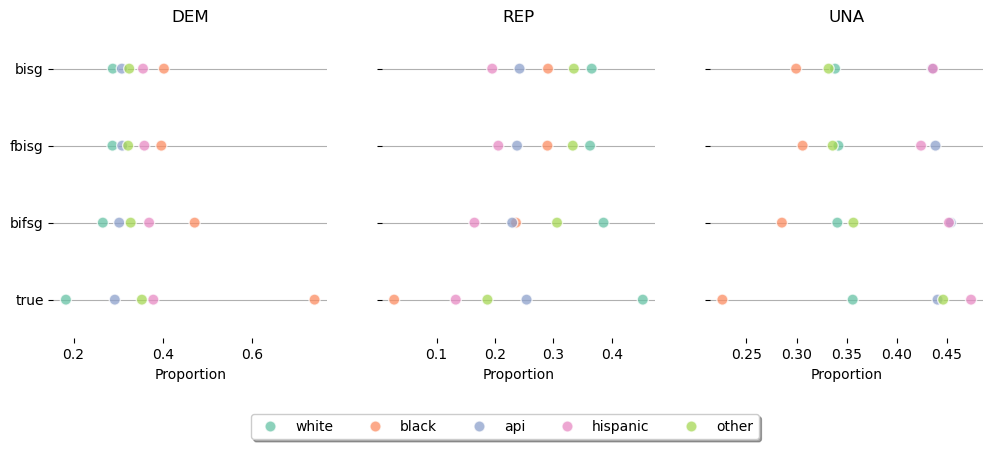

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axs = plt.subplots(1,3, figsize=(12,4))

for i, party in enumerate(["DEM", "REP", "UNA"]):
    df_party = rows[rows["party"] == party]
    sns.stripplot(data= df_party, 
                  x="Proportion", 
                  y="method", 
                  hue="race", 
                  ax = axs[i], 
                  palette=sns.color_palette("Set2"), 
                  size=8, 
                  jitter=False, 
                  alpha=0.75,
                  linewidth=1, 
                  edgecolor="w")
    axs[i].set_ylabel("")
    axs[i].xaxis.grid(False)
    axs[i].yaxis.grid(True)
    # axs[i].xaxis.set_major_locator(plt.MaxNLocator(4))
    # for n, label in enumerate(axs[i].xaxis.get_ticklabels()):
    #     label.set_visible(True)

    # ymin, ymax = axs[i].get_ylim()
    # axs[i].set_yticks(np.linspace(ymin, ymax, 4))

    party = party[0].upper() + party[1:]
    axs[i].set_title(party)
    if i != 0:
        axs[i].set_yticklabels([])
    if i == 2:
        plt.legend(loc="lower center", ncol=5, fancybox=True, shadow=True, bbox_to_anchor=(-.75, -.35))
    else:
        axs[i].get_legend().remove()

sns.despine(left=True, bottom=True)
plt.show()


# HMDA Dataset